In [1]:

import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts
from sklearn.preprocessing import LabelEncoder  # For encoding categorical target labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier
from sklearn.feature_selection import SelectKBest, f_classif  # For SelectKBest feature selection
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination (RFE)
from sklearn.metrics import accuracy_score  # For model evaluation
import joblib  # For saving and loading models
import tkinter as tk  # For GUI
from tkinter import filedialog, messagebox  # For file operations and displaying messages in GUI


In [2]:
data = pd.read_csv(r"D:\Human Activity Recognition\train.csv")
data_test = pd.read_csv(r"D:\Human Activity Recognition\test.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None


In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
data.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [6]:
data.shape

(7352, 563)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of Rows 7352
Number of columns 563


In [8]:
data.duplicated().any()

False

In [9]:
duplicated_columns = data.columns[data.T.duplicated()].tolist()
len(duplicated_columns)

21

In [10]:

data = data.drop(duplicated_columns,axis=1)
data.shape

(7352, 542)

In [11]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

In [12]:
df = pd.concat([data, data_test], ignore_index=True)

<Axes: xlabel='Activity', ylabel='count'>

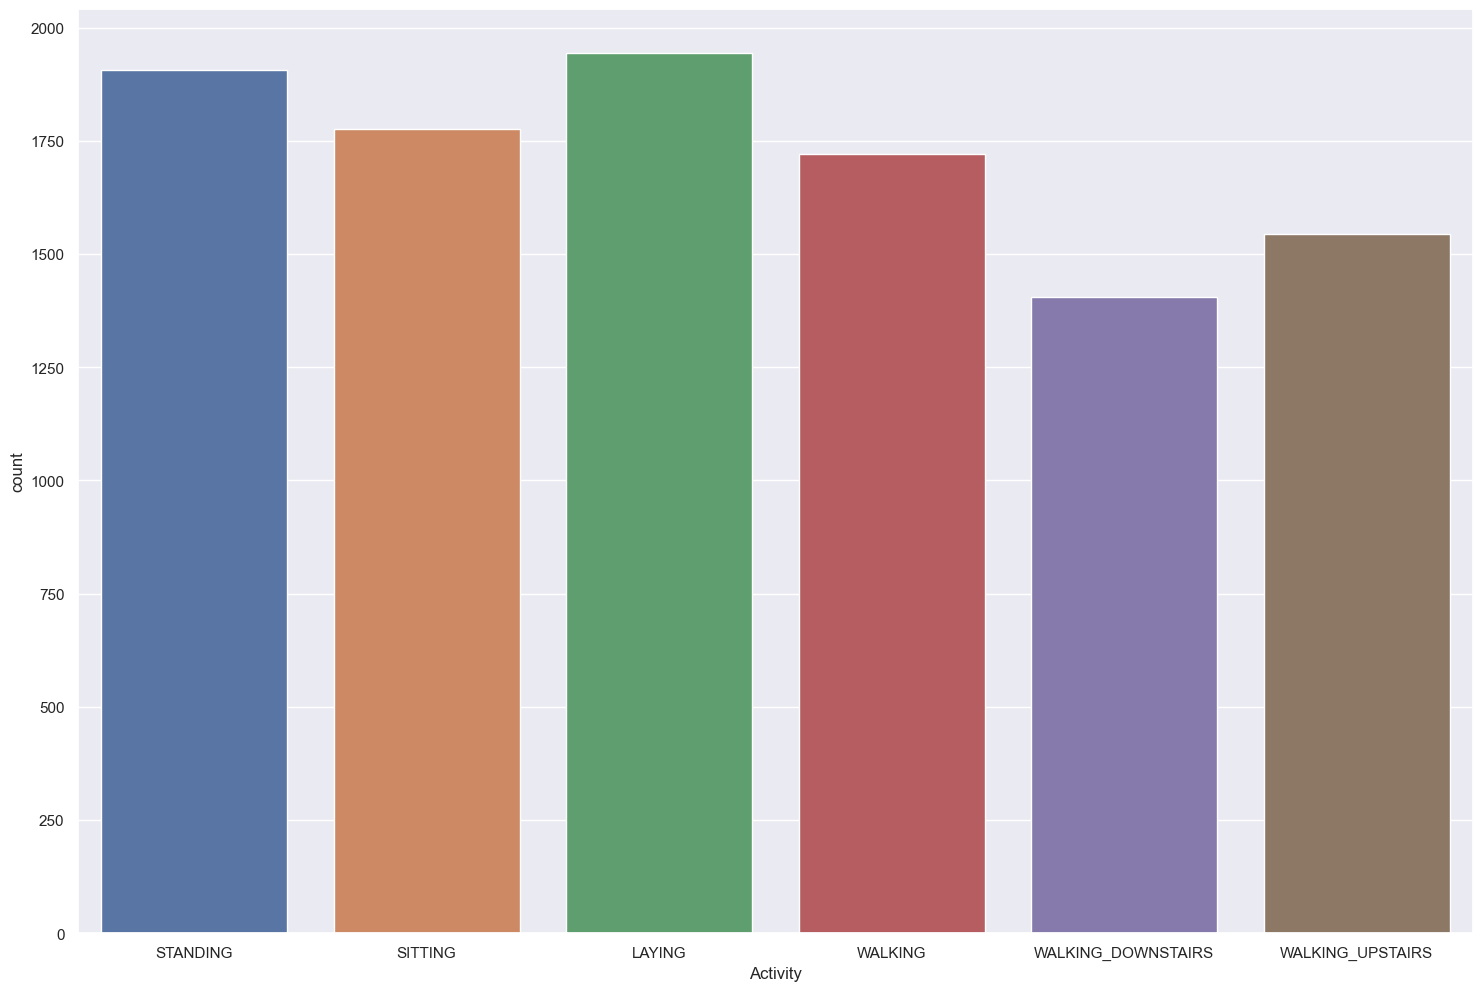

In [13]:

plt.figure(figsize =(18,12))
sns.set()
sns.countplot(data=df, x= "Activity")

In [14]:
X = data.drop('Activity',axis=1)
y= data['Activity']

In [15]:
y


0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [17]:
log  = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9789259007477906

In [19]:

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.9809653297076818

In [21]:
k=200
selector = SelectKBest(f_classif,k=k)
X_train_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

200


In [22]:
estimator = RandomForestClassifier()

In [23]:
k=100
rfe_selector = RFE(estimator,n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected,y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

In [ ]:
print(len(selected_features_rfe))

100


In [ ]:

rf = RandomForestClassifier()
rf.fit(X_train_selected_rfe,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test_selected_rfe)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9809653297076818

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X_train_selected_rfe, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
joblib.dump(rf,"model_rfe")

['model_rfe']

In [ ]:
joblib.dump(selector,"k_best_selector")

['k_best_selector']

In [ ]:
joblib.dump(rfe_selector,"rfe_selector")

['rfe_selector']

In [ ]:
data_test=data_test.drop("Activity",axis=1)
duplicated_columns = data_test.columns[data_test.T.duplicated()].to_list()
data_test = data_test.drop(duplicated_columns,axis=1)
model = joblib.load('model_rfe')
selector = joblib.load('k_best_selector')
rfe_selector = joblib.load('rfe_selector')
selector=selector.transform(data_test)
X_test_selected_rfe = rfe_selector.transform(selector)

In [ ]:
model.predict(X_test_selected_rfe)

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [ ]:

def open_file():
    filepath=filedialog.askopenfile(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            
def process_data(data):
    # Find columns with the same values
    #data= data.drop("Activity",axis=1)
    duplicated_columns = data.columns[data.T.duplicated()].tolist()
    # Remove columns with the same values
   
    data_test = data.drop(duplicated_columns, axis=1)
 
    model = joblib.load("model_rfe")
    # Load the SelectKBest object from the file
    selector = joblib.load('k_best_selector')
    rfe_selector = joblib.load('rfe_selector')
    
    # Transform the new data using the loaded SelectKBest object
    X_test_selected = selector.transform(data_test)
    
    # Transform the new data using the loaded RFE object
    X_test_selected_rfe = rfe_selector.transform(X_test_selected)
    y_pred=model.predict(X_test_selected_rfe)
    # standing : 0, sitting : 1,laying : 2, WALKING_DOWNSTAIRS: 3, 
    # walking_upstairs:4,walking : 5
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing',1:'Sitting',2:'Laying',
                        3: 'Walking_downstairs',4: 'Walking_upstairs',
                        5:"Walking"})
    data['Predicted_target']=y_pred
    save_file(data)

def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
            
    
# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()

: 